# Specification of a Petrinet and Reachbility Graph

In [64]:
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pm4py --user
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery


# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.footprints import visualizer as fp_visualizer
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator

import pm4py

The following code models and analyses a simple process in a doctor's office. A patient first waits to be served. Than she either receives consultation, makes an appointment or gets a prescription.

In [65]:
net = PetriNet("order_to_cash")

In [66]:
# creating places: source, p_1 and sink place
p_1 = PetriNet.Place("p_1")
p_2 = PetriNet.Place("p_2")
p_3 = PetriNet.Place("p_3")
p_4 = PetriNet.Place("p_4")
p_5 = PetriNet.Place("p_5")
p_6 = PetriNet.Place("p_6")
p_7 = PetriNet.Place("p_7")
p_8 = PetriNet.Place("p_8")

# add the places to the Petri Net
net.places.add(p_1)
net.places.add(p_2)
net.places.add(p_3)
net.places.add(p_4)
net.places.add(p_5)
net.places.add(p_6)
net.places.add(p_7)
net.places.add(p_8)


In [67]:
# Create transitions
place_order = PetriNet.Transition("place_order", "place_order")
send_invoice = PetriNet.Transition("send_invoice", "send_invoice")
send_reminder = PetriNet.Transition("send_reminder", "send_reminder")
pay = PetriNet.Transition("pay", "pay")
prepare_delivery = PetriNet.Transition("prepare_delivery", "prepare_delivery")
make_delivery = PetriNet.Transition("make_delivery", "make_delivery")
confirm_payment = PetriNet.Transition("confirm_payment", "confirm_payment")
silent = PetriNet.Transition("silent", None)

# Add the transitions to the Petri Net
net.transitions.add(place_order)
net.transitions.add(send_invoice)
net.transitions.add(send_reminder)
net.transitions.add(pay)
net.transitions.add(prepare_delivery)
net.transitions.add(make_delivery)
net.transitions.add(confirm_payment)
net.transitions.add(silent)


In [68]:
# Add arcs
from pm4py.objects.petri_net.utils import petri_utils
petri_utils.add_arc_from_to(p_1, place_order, net)
petri_utils.add_arc_from_to(place_order, p_2, net)
petri_utils.add_arc_from_to(p_2, send_invoice, net)
petri_utils.add_arc_from_to(send_invoice, p_3, net)
petri_utils.add_arc_from_to(p_3, send_reminder, net)
petri_utils.add_arc_from_to(send_reminder, p_4, net)
petri_utils.add_arc_from_to(p_4, pay, net)
petri_utils.add_arc_from_to(pay, p_5, net)
petri_utils.add_arc_from_to(p_5, prepare_delivery, net)
petri_utils.add_arc_from_to(prepare_delivery, p_6, net)
petri_utils.add_arc_from_to(p_6, make_delivery, net)
petri_utils.add_arc_from_to(make_delivery, p_7, net)
petri_utils.add_arc_from_to(p_7, confirm_payment, net)
petri_utils.add_arc_from_to(confirm_payment, p_8, net)
petri_utils.add_arc_from_to(p_3, silent, net)
petri_utils.add_arc_from_to(silent, p_4, net)


(silent, None)->p_4

In [69]:
# Adding tokens
initial_marking = Marking()
initial_marking[p_1] = 1
final_marking = Marking()
final_marking[p_8] = 1

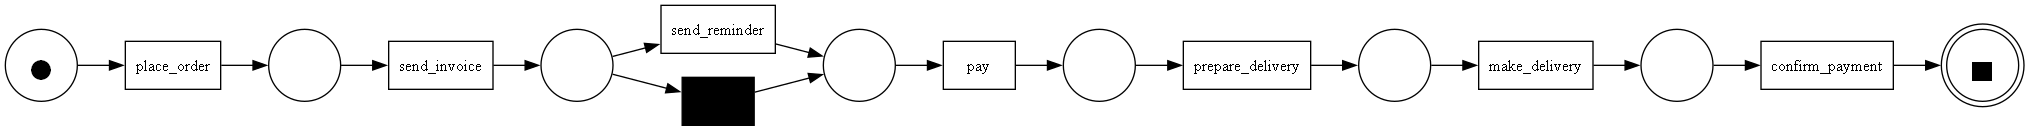

In [70]:
pm4py.view_petri_net(net, initial_marking, final_marking)

In [71]:
# next we create a reachability graph for the petri net
ts = reachability_graph.construct_reachability_graph(net, initial_marking)

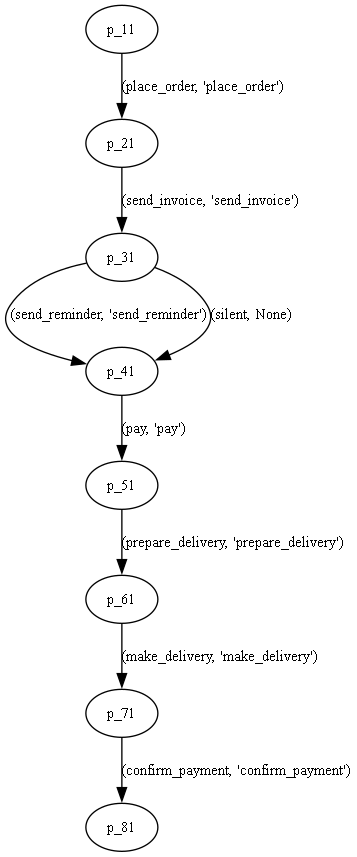

In [72]:
gviz = ts_visualizer.apply(ts)
ts_visualizer.view(gviz)

In [73]:
# play out all possible traces from the petri net
simulated_log = simulator.apply(net, initial_marking, variant=simulator.Variants.EXTENSIVE)
for trac in simulated_log:
    print(trac.attributes["concept:name"])
    # iterate over the activities (i.e. the transitions) of the trace
    for act in trac:
        print(act)

0
{'concept:name': 'place_order', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 41, tzinfo=datetime.timezone.utc)}
{'concept:name': 'send_invoice', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 42, tzinfo=datetime.timezone.utc)}
{'concept:name': 'send_reminder', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 43, tzinfo=datetime.timezone.utc)}
{'concept:name': 'pay', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 44, tzinfo=datetime.timezone.utc)}
{'concept:name': 'prepare_delivery', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 45, tzinfo=datetime.timezone.utc)}
{'concept:name': 'make_delivery', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 46, tzinfo=datetime.timezone.utc)}
{'concept:name': 'confirm_payment', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 47, tzinfo=datetime.timezone.utc)}
1
{'concept:name': 'place_order', 'time:timestamp': datetime.datetime(1970, 4, 26, 19, 46, 48, tzinfo=datetime.timezone.utc)